In [1]:
import pandas as pd
import numpy as np

np.random.seed(1349)

In [3]:
df = pd.read_csv('students.csv')

In [4]:
df

,name,math,english,reading,classroom,passing_math
0,Sally,62,85,80,A,failing
1,Jane,88,79,67,B,passing
2,Suzie,94,74,95,A,passing
3,Billy,98,96,88,B,passing
4,Ada,77,92,98,A,passing
5,John,79,76,93,B,passing
6,Thomas,82,64,81,A,passing
7,Marie,93,63,90,A,passing
8,Albert,92,62,87,A,passing
9,Richard,69,80,94,A,failing


In [5]:
df.passing_math.head()

0    failing
1    passing
2    passing
3    passing
4    passing
Name: passing_math, dtype: object

In [6]:
df.classroom.head()

0    A
1    B
2    A
3    B
4    A
Name: classroom, dtype: object

In [7]:
df.classroom.value_counts()

A    8
B    4
Name: classroom, dtype: int64

In [8]:
pd.crosstab(df.classroom, df.passing_math)

passing_math,failing,passing
classroom,,
A,2,6
B,0,4


## Reshaping

We will talk about reshaping operations in more detail when we discuss tidy data, but for now we will focus on a couple of common operations that can be used to summarize our data by different subgroups.

### `pd.crosstab`

For an example of `.crosstab`, we will count the number of students passing math in each classroom.

In [ ]:
#  cant do this : df.crosstab(df.passing_math, df.classroom)

In [ ]:
# We will use our student grades DataFrame, df.



We'll use the `pd.crosstab` function to count the number of occurances of each subgroup (i.e. each unique combination of classroom and whether or not the student is passing math):

In [9]:
pd.crosstab(df.classroom, df.passing_math)

passing_math,failing,passing
classroom,,
A,2,6
B,0,4


We can also view subtotals with the `margins` set to `True`.

In [10]:
pd.crosstab(df.classroom, df.passing_math, margins=True)

passing_math,failing,passing,All
classroom,,,
A,2,6,8
B,0,4,4
All,2,10,12


The `.crosstab` function will let us view the numbers as percentages of the total as well by setting `normalize` to `True`.

In [11]:
pd.crosstab(df.classroom, df.passing_math, margins=True, normalize=True)

passing_math,failing,passing,All
classroom,,,
A,0.166667,0.500000,0.666667
B,0.000000,0.333333,0.333333
All,0.166667,0.833333,1.000000


### `.pivot_table`

Here we use the `.pivot_table` method to create our summary. This method produces output similar to an excel pivot table. We must supply 3 things here:

- which values will make up the rows (the `index`)
- which values will make up the columns
- the values we are aggregating
- an aggregation method (`aggfunc`); if we can omit this, and `mean` will be used by default

For an example using the `pivot_table` method, we'll calculate the average math grade for the combination of `classroom` and `passing_math` status.

In [12]:
df.pivot_table(index='classroom', columns='passing_math', values='math')

passing_math,failing,passing
classroom,,
A,65.5,88.333333
B,NaN,89.250000


In [14]:
pd.DataFrame.pivot_table?

In [15]:
df.pivot_table(index='classroom', columns='passing_math', values='math', aggfunc='max')

passing_math,failing,passing
classroom,,
A,69.0,94.0
B,NaN,98.0


In [16]:
df.groupby(['passing_math', 'classroom']).math.max()

passing_math  classroom
failing       A            69
passing       A            94
              B            98
Name: math, dtype: int64

Here we'll create a dataframe that represents various orders at a restaurant.

In [17]:
n = 40

orders = pd.DataFrame({
    'drink': np.random.choice(['Tea', 'Water', 'Water'], n),
    'meal': np.random.choice(['Curry', 'Yakisoba Noodle', 'Pad Thai'], n),
})

orders.sample(10)

,drink,meal
26,Water,Yakisoba Noodle
19,Water,Curry
17,Water,Curry
27,Water,Curry
7,Water,Pad Thai
2,Water,Pad Thai
29,Water,Pad Thai
33,Water,Yakisoba Noodle
37,Tea,Yakisoba Noodle
14,Tea,Yakisoba Noodle


#### `.map`

The `.map` method lets us use a dictionary to calculate the total price for an order; then I can save my calculations to a new column named `bill`. Let's do this step-by-step.

In [18]:
# Create a dictionary of prices for drinks and meals.

prices = {
    'Yakisoba Noodle': 9,
    'Curry': 11,
    'Pad Thai': 10,
    'Tea': 2,
    'Water': 0,
}

In [21]:
"""
Match the values in the 'drink' and 'meal' columns with the values in the 'prices' dictionary 
and perform the specified calculation. Save this calculation to a new column named 'bill'.
"""

orders['bill'] = orders.drink.map(prices) + orders.meal.map(prices)

In [22]:
orders.head()

,drink,meal,bill
0,Water,Pad Thai,10
1,Water,Curry,11
2,Water,Pad Thai,10
3,Tea,Pad Thai,12
4,Water,Pad Thai,10


Let's take a look at how many orders have each combination of meal and drink:

In [23]:
pd.crosstab(orders.drink, orders.meal, margins=True)

meal,Curry,Pad Thai,Yakisoba Noodle,All
drink,,,,
Tea,2,5,4,11
Water,9,11,9,29
All,11,16,13,40


In [24]:
orders.pivot_table(index='drink', columns='meal')

bill                         
meal  Curry Pad Thai Yakisoba Noodle
drink                               
Tea      13       12              11
Water    11       10               9

In [25]:
orders.pivot_table(index='drink', columns='meal', values='bill', aggfunc='mean')

meal,Curry,Pad Thai,Yakisoba Noodle
drink,,,
Tea,13,12,11
Water,11,10,9


And let's find out the average bill amount for each combination: 

It's interesting to note that we could find the same information with a multi-level group by:

In [26]:
orders.groupby(['meal', 'drink']).bill.agg('mean')

meal             drink
Curry            Tea      13.0
                 Water    11.0
Pad Thai         Tea      12.0
                 Water    10.0
Yakisoba Noodle  Tea      11.0
                 Water     9.0
Name: bill, dtype: float64

The choice between group by and a pivot table here is mostly asthetic, and you should use whichever makes more sense to you with the problem at hand. 

### Transposing

In [27]:
orders

,drink,meal,bill
0,Water,Pad Thai,10
1,Water,Curry,11
2,Water,Pad Thai,10
3,Tea,Pad Thai,12
4,Water,Pad Thai,10
5,Water,Pad Thai,10
6,Water,Yakisoba Noodle,9
7,Water,Pad Thai,10
8,Water,Pad Thai,10
9,Water,Pad Thai,10


In [28]:
orders.T

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
drink,Water,Water,Water,Tea,Water,Water,Water,Water,Water,Water,...,Tea,Tea,Tea,Water,Water,Water,Water,Tea,Water,Water
meal,Pad Thai,Curry,Pad Thai,Pad Thai,Pad Thai,Pad Thai,Yakisoba Noodle,Pad Thai,Pad Thai,Pad Thai,...,Pad Thai,Pad Thai,Pad Thai,Yakisoba Noodle,Curry,Yakisoba Noodle,Yakisoba Noodle,Yakisoba Noodle,Pad Thai,Yakisoba Noodle
bill,10,11,10,12,10,10,9,10,10,10,...,12,12,12,9,11,9,9,11,10,9


In [30]:
orders.describe()

,bill
count,40.000000
mean,10.500000
std,1.132277
min,9.000000
25%,10.000000
50%,10.500000
75%,11.000000
max,13.000000


In [31]:
orders.describe().T

,count,mean,std,min,25%,50%,75%,max
bill,40.0,10.5,1.132277,9.0,10.0,10.5,11.0,13.0


## Exercises III

1. Use your `get_db_url` function to help you explore the data from the `chipotle` database. 

In [32]:
def get_db_url(schema):
    import env
    user = env.username
    password = env.password
    host = env.host
    conn = f'mysql+pymysql://{user}:{password}@{host}/{schema}'
    return conn

In [39]:
query = 'SELECT * FROM orders'

In [40]:
chip = pd.read_sql(query, get_db_url('chipotle'))

In [42]:
chip.head(10)

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,6,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,7,3,1,Side of Chips,nan,$1.69
7,8,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,9,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,10,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [43]:
chip.describe()

,id,order_id,quantity
count,4622.000000,4622.000000,4622.000000
mean,2311.500000,927.254868,1.075725
std,1334.400802,528.890796,0.410186
min,1.000000,1.000000,1.000000
25%,1156.250000,477.250000,1.000000
50%,2311.500000,926.000000,1.000000
75%,3466.750000,1393.000000,1.000000
max,4622.000000,1834.000000,15.000000


In [44]:
chip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  4622 non-null   int64 
 1   order_id            4622 non-null   int64 
 2   quantity            4622 non-null   int64 
 3   item_name           4622 non-null   object
 4   choice_description  4622 non-null   object
 5   item_price          4622 non-null   object
dtypes: int64(3), object(3)
memory usage: 216.8+ KB


In [70]:
chip.to_csv('chipotle.csv')

2. What is the total price for each order?

In [46]:
chip.groupby(['order_id', 'item_name']).item_price.agg('sum')

order_id  item_name                            
1         Chips and Fresh Tomato Salsa                          $2.39 
          Chips and Tomatillo-Green Chili Salsa                 $2.39 
          Izze                                                  $3.39 
          Nantucket Nectar                                      $3.39 
2         Chicken Bowl                                         $16.98 
                                                          ...         
1831      Chips                                                 $2.15 
1832      Chicken Soft Tacos                                    $8.75 
          Chips and Guacamole                                   $4.45 
1833      Steak Burrito                                 $11.75 $11.75 
1834      Chicken Salad Bowl                       $11.25 $8.75 $8.75 
Name: item_price, Length: 4292, dtype: object

In [66]:
chip['item_price_num'] = chip.item_price.str.strip('$').astype(float)

In [75]:
order_price = chip.groupby(['order_id']).item_price_num.sum()

In [76]:
order_price

order_id
1       11.56
2       16.98
3       12.67
4       21.00
5       13.70
        ...  
1830    23.00
1831    12.90
1832    13.20
1833    23.50
1834    28.75
Name: item_price_num, Length: 1834, dtype: float64

In [77]:
order_price.describe()

count    1834.000000
mean       18.811429
std        11.652512
min        10.080000
25%        12.572500
50%        16.200000
75%        21.960000
max       205.250000
Name: item_price_num, dtype: float64

In [78]:
import matplotlib.pyplot as plt

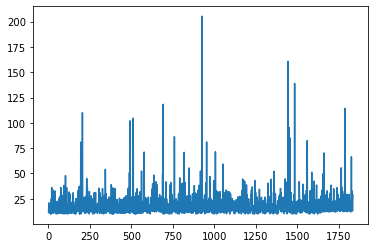

In [81]:
plt.plot(order_price)
plt.show()

In [88]:
norm_op = (order_price - order_price.mean()) / order_price.std()

In [90]:
round(norm_op.describe())

count    1834.0
mean       -0.0
std         1.0
min        -1.0
25%        -1.0
50%        -0.0
75%         0.0
max        16.0
Name: item_price_num, dtype: float64

3. What are the most popular 3 items?

In [71]:
# groupby chip.item_name as below 
# grab the quantity and get their sums
# sort by the values and do it desc be setting ascending to False
# grab the first 3 from the head
chip.groupby('item_name').quantity.sum().sort_values(ascending=False).head(3)

item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Name: quantity, dtype: int64

4. Which item has produced the most revenue?

In [69]:
chip.groupby('item_name').item_price_num.sum().nlargest(1)

item_name
Chicken Bowl    7342.73
Name: item_price_num, dtype: float64

5. Using the `titles` DataFrame, visualize the number of employees with each title.

6. Join the `employees` and `titles` DataFrames together.

7. Visualize how frequently employees change titles.

8. For each title, find the hire date of the employee that was hired most recently with that title.

9. Write the code necessary to create a cross tabulation of the number of titles by department. (Hint: this will involve a combination of SQL code to pull the necessary data and python/pandas code to perform the manipulations.)